# Project 7 - Machine Learning

Becca Banning - 10/8/24

https://github.com/rlb913/datafun-07-ml

## Import Dependencies

In [17]:
import matplotlib
import matplotlib.pyplot as plt
import pandas as pd
from scipy import stats
import seaborn as sns
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

## Part 1 - Chart a Straight Line

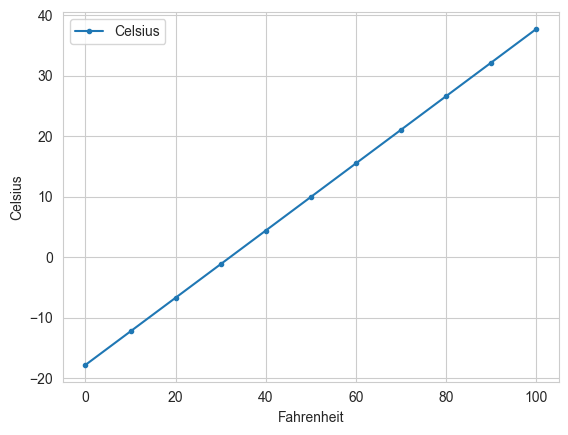

In [18]:
c = lambda f: 5 / 9 * (f - 32)
temps = [(f, c(f)) for f in range(0, 101, 10)]
temps_df = pd.DataFrame(temps, columns=['Fahrenheit', 'Celsius'])
axes = temps_df.plot(x='Fahrenheit', y='Celsius', style='.-')
y_label = axes.set_ylabel('Celsius')

## Part 2 - Prediction

### Section 1 - Data Acquisition

In [19]:
nyc_df = pd.read_csv('ave_hi_nyc_jan_1895-2018.csv')

### Section 2 - Data Inspection

In [20]:
nyc_df.head()
nyc_df.tail()

,Date,Value,Anomaly
119,201401,35.5,-1.9
120,201501,36.1,-1.3
121,201601,40.8,3.4
122,201701,42.8,5.4
123,201801,38.7,1.3


### Section 3 - Data Cleaning

In [21]:
nyc_df.columns = ['Date', 'Temperature', 'Anomaly']
nyc_df.head(3)

,Date,Temperature,Anomaly
0,189501,34.2,-3.2
1,189601,34.7,-2.7
2,189701,35.5,-1.9


In [22]:
nyc_df.Date.dtype

dtype('int64')

In [23]:
nyc_df.Date = nyc_df.Date.floordiv(100)
nyc_df.head(3)

,Date,Temperature,Anomaly
0,1895,34.2,-3.2
1,1896,34.7,-2.7
2,1897,35.5,-1.9


### Section 4 - Descriptive Statistics

In [24]:
pd.set_option('display.precision', 2)
nyc_df.Temperature.describe()

count    124.00
mean      37.60
std        4.54
min       26.10
25%       34.58
50%       37.60
75%       40.60
max       47.60
Name: Temperature, dtype: float64

### Section 5 - Build the Model

In [25]:
linear_regression = stats.linregress(x=nyc_df.Date,
                                     y=nyc_df.Temperature)
linear_regression.slope
linear_regression.intercept

np.float64(8.694993233674289)

### Section 6 - Predict

In [26]:
linear_regression.slope * 2024 + linear_regression.intercept
linear_regression.slope * 1890 + linear_regression.intercept

np.float64(36.612865774980335)

### Section 7 - Visualizations

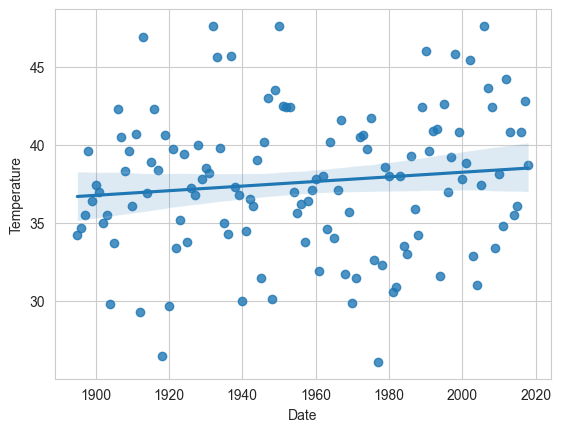

In [27]:
sns.set_style('whitegrid')
axes = sns.regplot(x=nyc_df.Date, y=nyc_df.Temperature)

(10.0, 70.0)

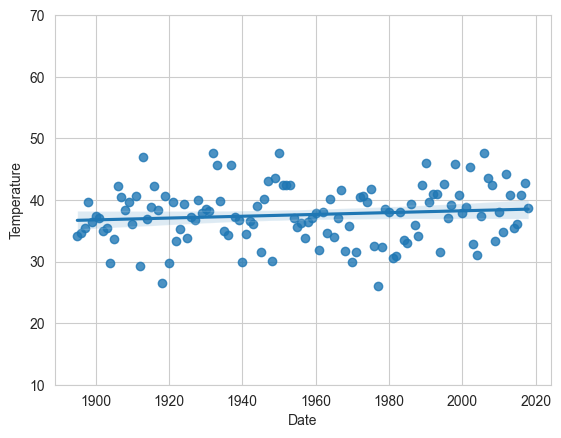

In [28]:
sns.set_style('whitegrid')
axes = sns.regplot(x=nyc_df.Date, y=nyc_df.Temperature)
axes.set_ylim(10, 70)

## Part 3 - Prediction

### Section 1 - Build the Model

In [29]:
X_train, X_test, y_train, y_test = train_test_split(
    nyc_df.Date.values.reshape(-1, 1), nyc_df.Temperature.values,
    random_state=11)
 
X_train.shape

X_test.shape

(31, 1)

### Section 2 - Test the Model

In [32]:
model = LinearRegression()
model.fit(X_train, y_train)

print(f"Coefficient: {model.coef_[0]}, Intercept: {model.intercept_}")

y_pred = model.predict(X_test)

comparison_df = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})
print(comparison_df.head())


Coefficient: 0.01939167329478278, Intercept: -0.30779820252658396
   Actual  Predicted
0    31.7      37.86
1    35.5      36.48
2    40.5      37.93
3    29.8      36.61
4    40.7      36.75


### Section 3 - Predict 

In [35]:
future_prediction = model.predict(np.array([[2024]]))
print(f"Predicted Average High Temp in Jan 2024: {future_prediction[0]:.2f} °F")

Predicted Average High Temp in Jan 2024: 38.94 °F


### Section 4 - Visualizations

(10.0, 70.0)

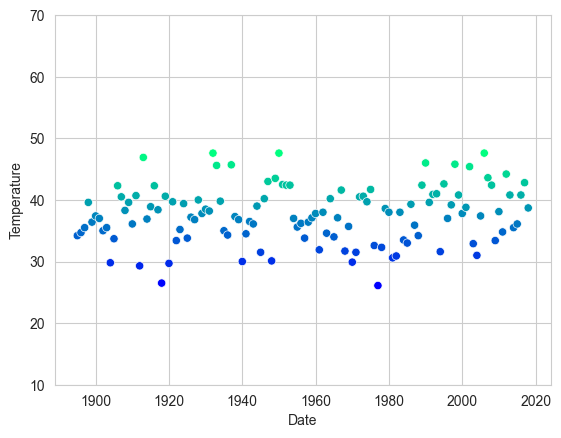

In [ ]:
axes = sns.scatterplot(data=nyc_df, x='Date', y='Temperature',
                       hue='Temperature', palette='winter', legend=False)
axes.set_ylim(10, 70)

In [ ]:
x = np.array([min(nyc_df.Date.values), max(nyc_df.Date.values)])
y = predict(x)

sns.set_style('whitegrid')
axes = sns.regplot(x=nyc_df.Date, y=nyc_df.Temperature)
axes.set_ylim(10, 70)

AttributeError: 'LinregressResult' object has no attribute 'coef_'

## Part 4 - Add Your Insights

The first approach, using Time Series and Simple Linear Regression with coefficients to forecast temperatures, predicted a value of 38.59 for the year 2024.

In contrast, the second approach, which used actual calculations within the same models, estimated a slightly higher temperature of 38.94 for 2024.

Both models suggest a gradual increase in average temperature throughout the period analyzed.

Interestingly, projections extended to the year 2080, when today's college students will be around 75 years old, indicate that the average temperature could exceed 40 degrees, reflecting a rise of approximately 4 degrees since 1890.